# **Project Name** 

 **Live Class Monitoring System(Face Emotion Recognition)**

# **This is a Individual Project and here is my individual notebook:-**


1.   **Soumya R. Mishra**




# **Project Indroduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. 
India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms.

 One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. 

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms.

 Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


# **Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.

The solution to this problem is by recognizing facial emotions.





# **What is Face Emotion Recognition ?**

This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

# **Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf
import cv2
import os

In [ ]:
import sys, os
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

# **Image Data First Look**

In [ ]:
# Image Reading
img_array=cv2.imread("Training1/0/Training_426842.jpg")

In [ ]:
img_array.shape

(48, 48, 3)

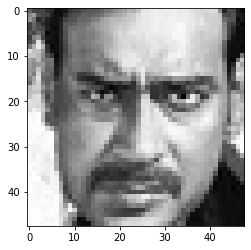

In [ ]:
plt.imshow(img_array)

In [ ]:
Datadirectory="Training1/"
Datadirectory_test="Testing/"

In [ ]:
Classes=["0","1","2","3","4","5","6"]

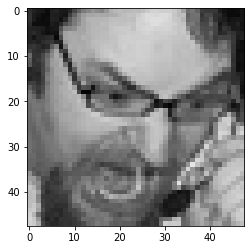

In [ ]:
# Merging the Data directory to the classses using os to get all the images.
for category in Classes:
    path=os.path.join(Datadirectory_test,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

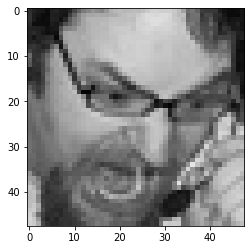

In [ ]:
img_size=48
new_array=cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(48, 48, 3)

# **Method 1: Directly Using DeepFace**

In [ ]:
# Installing DeepFace
pip install deepface

     |████████████████████████████████| 61kB 4.7MB/s 
     |████████████████████████████████| 2.3MB 12.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.12.2-cp37-none-any.whl size=9693 sha256=12f2060ffeeec1093aa117dea3e3661cf336a10a1a515cf32e48cdda635da1e7
  Stored in directory: /root/.cache/pip/wheels/81/d0/d7/d9983facc6f2775411803e0e2d30ebf98efbf2fc6e57701e09
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
# Upload A file from local Drive
from google.colab import files
uploaded = files.upload()

Saving portrait-young-angry-man-260nw-157245086.jpg to portrait-young-angry-man-260nw-157245086.jpg


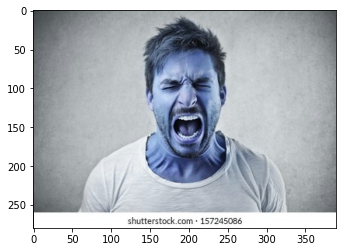

In [ ]:
# Image Show
import cv2
import matplotlib.pyplot as plt
img_array=cv2.imread("portrait-young-angry-man-260nw-157245086.jpg")
plt.imshow(img_array)

In [ ]:
# Analyze Image using DeepFace
from deepface import DeepFace
obj = DeepFace.analyze(img_path = "portrait-young-angry-man-260nw-157245086.jpg", actions = ['age', 'gender', 'race', 'emotion'])
print(obj["age"]," years old ",obj["dominant_race"]," ",obj["dominant_emotion"]," ", obj["gender"])

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=13iUHHP3SlNg53qSuQZDdHDSDNdBP9nwy
To: /root/.deepface/weights/facial_expression_model_weights.zip
5.54MB [00:00, 27.2MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1YCox_4kJ-BYeXq27uUbasu--yz28zUMV
To: /root/.deepface/weights/age_model_weights.h5
539MB [00:12, 42.5MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk
To: /root/.deepface/weights/gender_model_weights.h5
537MB [00:14, 38.4MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1nz-WDhghGQBC4biwShQ9kYjvQMpO6smj
To: /root/.deepface/weights/race_model_single_batch.zip
511MB [00:04, 125MB/s]
Action: emotion: 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

31  years old  middle eastern   happy   Man


**Remarks :**
* The actual emotion in the  Picture above is ANGRY Face but using DeepFace I found the prediction is HAPPY.
* It's Better to train my own model.

# **Method 2 : Transfer Learning Using CPU**

## **Image PreProcessing**

### **Reading all the images and converting them to array**

In [ ]:
Datadirectory="Training1/"
Datadirectory_test="Testing/"
Classes=["0","1","2","3","4","5","6"]

In [ ]:
#Read all Training images
training_Data=[]

def creat_training_data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
creat_training_data()
print(len(training_Data))

import random

random.shuffle(training_Data)

X=[]
y=[]
# Converting to array and dimension for transfer Learning
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

12436


In [ ]:
#Read all Testing images
testing_Data=[]

def creat_testing_data():
    for category in Classes:
        path=os.path.join(Datadirectory_test,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                testing_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [ ]:
creat_testing_data()
print(len(testing_Data))

import random

random.shuffle(testing_Data)

X_test=[]
y_test=[]
# Converting to array and dimension for transfer Learning
for features,label in testing_Data:
    X_test.append(features)
    y_test.append(label)
    
X_test=np.array(X_test).reshape(-1, img_size, img_size, 3) # converting it to 4 dimension

7178


In [ ]:
# normalize the data
X= X/255.0;
Y=np.array(y)

In [ ]:
# normalize the data
X_test= X_test/255.0;
Y_test=np.array(y_test)

## **Deep Learning Model For Training-Transfer Learning**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Using Pretrained MobileNetVerion2
model=tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

## **Transfer Learning**

In [ ]:
base_input=model.layers[0].input ## Input

In [ ]:
base_output = model.layers[-2].output ## Output

In [ ]:
base_output

<tf.Tensor 'global_average_pooling2d/Mean:0' shape=(None, 1280) dtype=float32>

In [ ]:
final_output=layers.Dense(128)(base_output) ## adding new layer, after the output of global pooling layer
final_output=layers.Activation('relu')(final_output) ## activation function
final_output=layers.Dense(64)(final_output)
final_output=layers.Activation ('relu')(final_output)
final_output= layers.Dense(7, activation='softmax')(final_output) ## set classes of 7 , the original has 1000 classes

In [ ]:
final_output ## output

<tf.Tensor 'dense_2/Softmax:0' shape=(None, 7) dtype=float32>

In [ ]:
new_model=keras.Model(inputs=base_input, outputs= final_output)

In [ ]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
# compile
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
#Training
new_model.fit(X,Y,epochs=25)

Epoch 1/25
389/389 [==============================] - 3352s 9s/step - loss: 1.4279 - accuracy: 0.4546
Epoch 2/25
389/389 [==============================] - 3591s 9s/step - loss: 1.2180 - accuracy: 0.5337
Epoch 3/25
389/389 [==============================] - 3467s 9s/step - loss: 1.1236 - accuracy: 0.5733
Epoch 4/25
389/389 [==============================] - 3618s 9s/step - loss: 1.0492 - accuracy: 0.6070
Epoch 5/25
389/389 [==============================] - 4143s 11s/step - loss: 0.9841 - accuracy: 0.6294
Epoch 6/25
389/389 [==============================] - 3938s 10s/step - loss: 0.9024 - accuracy: 0.6603
Epoch 7/25
389/389 [==============================] - 4071s 10s/step - loss: 0.8401 - accuracy: 0.6894
Epoch 8/25
389/389 [==============================] - 2839s 7s/step - loss: 0.7974 - accuracy: 0.7028
Epoch 9/25
389/389 [==============================] - 2710s 7s/step - loss: 0.7305 - accuracy: 0.7309
Epoch 10/25
389/389 [==============================] - 2960s 8s/step - loss: 0.

In [ ]:
# Save Model
new_model.save('Final_model_all_data.h5')

In [ ]:
#Load Model
new_model=tf.keras.models.load_model('Final_model_all_data.h5')

In [ ]:
new_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
# Show scores on X_test,Y_test
scores = new_model.evaluate(X_test,Y_test)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

225/225 [==============================] - 20s 87ms/step - loss: 11.5124 - accuracy: 0.0000e+00
Loss: 11.512420654296875
Accuracy: 0.0


In [ ]:
frame=cv2.imread("disgust3.jpg")

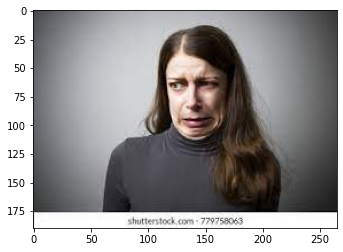

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [ ]:
# Face detection algorithm

In [ ]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(190, 265)

In [ ]:
# Dectection and putting rectangle and cropping on the face
faces= faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color=frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w,y+h+12),(255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi= roi_color[ey:ey+eh,ex:ex+ew]

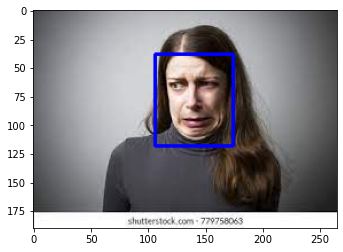

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

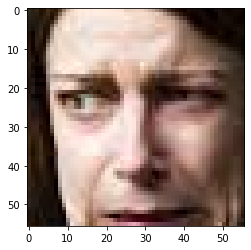

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
#predicting the image emotion
Predictions=new_model.predict(final_image)

In [ ]:
np.argmax(Predictions) ### 3 = Happy

3

**Remarks :**


* I have tried to connect my jupyter notebook to AMD Radeon Vega 8 GPU , But i couldn't able to connect my GPU because i don't have any Nvidia GPU to install CUDA and CUDNN to work with.I searched in google that how to connect AMD GPU to jupyter notebook and it showed me to install RComs and i tried to install n failed.
Again i tried to creat 2 more environments as one for tensorflow-gpu and one for tensorflow-directrml.
For tensorflow-gpu my gpu didn't work and for tensorflow-directml my gpu worked but i got some attribute and version error as the tensorflow-directml had a version of 1.15.1.

* So, i decided to train my model using CPU.while training i got MemoryError. So i fixed it by setting the paging file upto 100gb in  my system and then it fixed and it took around 1hr for 1 epochs and 21 hrs for all epochs.

* I have trained the model for around 21 hours and got the accuracy of 94% ,But while testing i got the accuracy of 0%. I tried to see the prediction of an image and found that the prediction was wrong. All work lost and need to start work again.


* Then i thought i will work with Google collab using GPU. Thus i uploaded 35k images to my google drive which took around 10 hrs to be uploaded.
And  in google collab it took around 25 mins to converting all the images to array.

* So I started working again with a different approach while creating layers and trained them using CPU in jupyter notebook. 

# **Method 3 : Creating Layers Using CPU**

## **Importing Libraries**

In [ ]:
#Importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

## **Displaying Images**

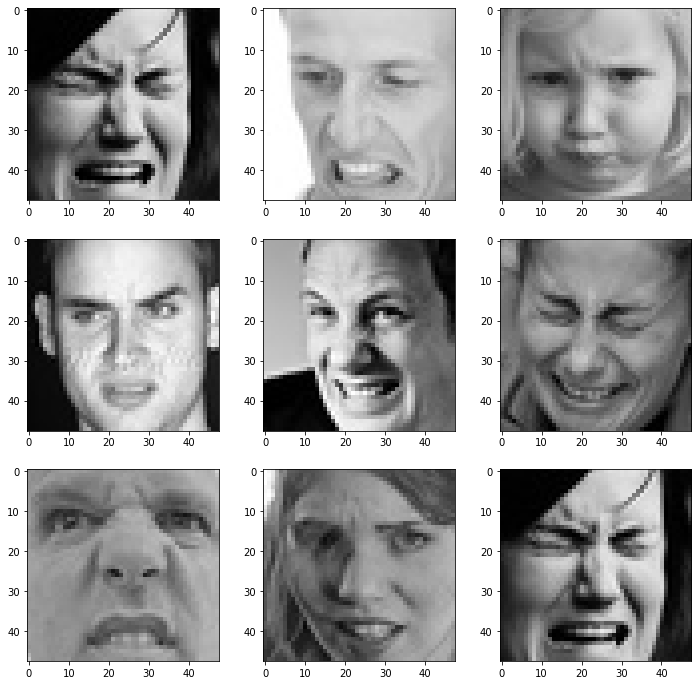

In [ ]:
#Displaying Images

picture_size = 48
folder_path = "images/"

expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## **Making Training and Validation Data**

In [ ]:
#Making Training and Validation Data
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## **Model Building**

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

## **Fitting the Model with Training and Validation Data**

In [ ]:
#Fitting the Model with Training and Validation Data
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])



In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/48
225/225 [==============================] - 1646s 7s/step - loss: 1.7723 - accuracy: 0.3168 - val_loss: 1.4866 - val_accuracy: 0.4318
Epoch 2/48
225/225 [==============================] - 1491s 7s/step - loss: 1.4253 - accuracy: 0.4515 - val_loss: 1.4794 - val_accuracy: 0.4412
Epoch 3/48
225/225 [==============================] - 1472s 7s/step - loss: 1.2738 - accuracy: 0.5156 - val_loss: 1.5020 - val_accuracy: 0.4381
Epoch 4/48
225/225 [==============================] - 1514s 7s/step - loss: 1.1874 - accuracy: 0.5508 - val_loss: 1.2656 - val_accuracy: 0.5182
Epoch 5/48
225/225 [==============================] - 1556s 7s/step - loss: 1.1176 - accuracy: 0.5747 - val_loss: 1.1190 - val_accuracy: 0.5794
Epoch 6/48
225/225 [==============================] - 1842s 8s/step - loss: 1.0684 - accuracy: 0.5954 - val_loss: 1.1700 - val_accuracy: 0.5662
Epoch 7/48
225/225 [==============================] - 1962s 

## **Saving Model**

In [ ]:
model.save('Final_modified_model_all_data.h5')

## **Plotting Accuracy & Loss**

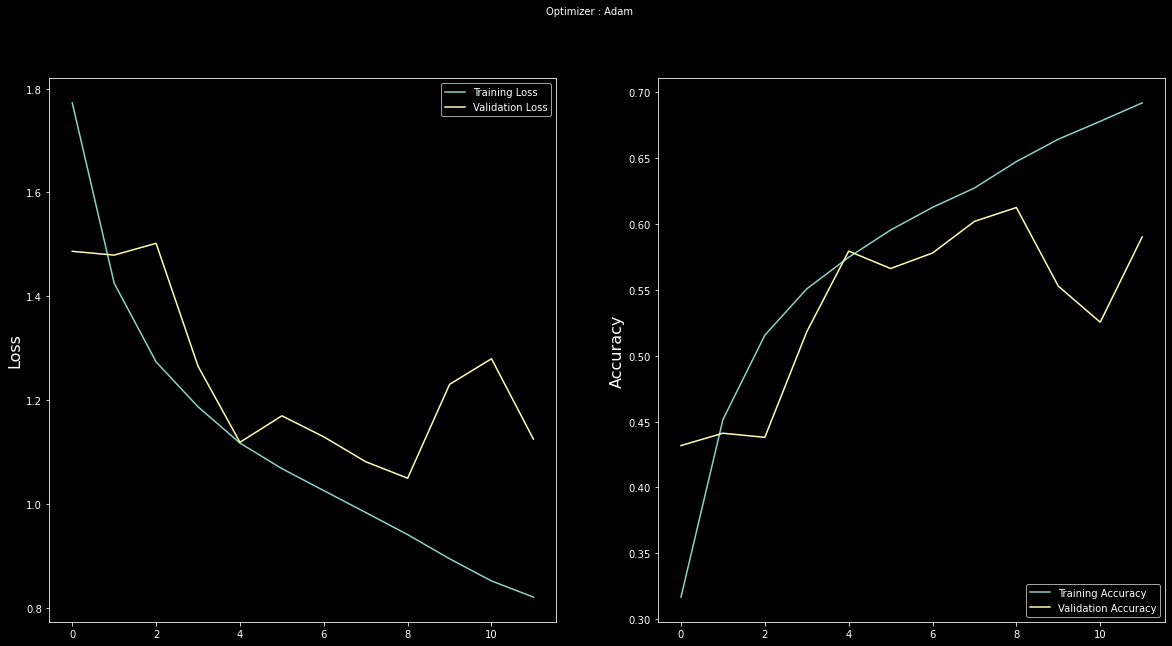

In [ ]:

# Plotting Accuracy & Loss

plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Remarks :**
* It took around 7-8 hours and stopped due to Early Stopping otherwise it would take around 23 hrs for all epochs.
* The training gave the accuracy of 69% and va_accuracy of 59%.
It seems good. So, I save the model but the detection i got from live video was average.

* So i think i should improve the score. while just googling regarding this i got to know about Kaggle Kernel, where i can use GPU till 38 hrs from one account.
*  Thus i decided that i will use kaggle kernel and do some hyperparameter tuning to get more accuracy.

# **Method 4 : Creating Layers Using Kaggle Kernel GPU**

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


## **Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop


## **Displaying Images**

In [ ]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

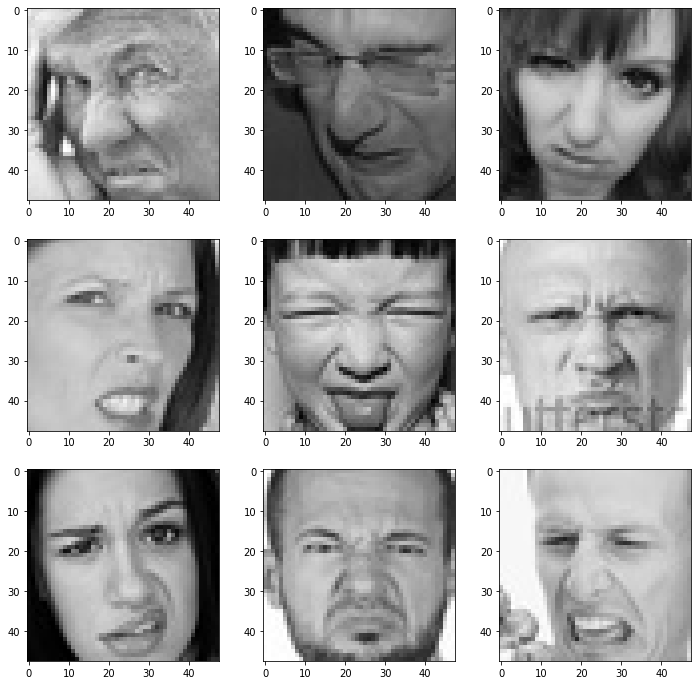

In [ ]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

## **Making Training and Validation Data**

In [ ]:
#Making Training and Validation Data
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.



## **Model Building**

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_6 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)      


## **Fitting the Model with Training and Validation Data**

In [ ]:
#Fitting the Model with Training and Validation Data
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
225/225 [==============================] - 229s 994ms/step - loss: 1.9660 - accuracy: 0.2496 - val_loss: 1.6541 - val_accuracy: 0.3597
Epoch 2/48
225/225 [==============================] - 26s 115ms/step - loss: 1.5248 - accuracy: 0.4158 - val_loss: 1.6227 - val_accuracy: 0.4114
Epoch 3/48
225/225 [==============================] - 26s 114ms/step - loss: 1.3166 - accuracy: 0.4932 - val_loss: 1.4096 - val_accuracy: 0.4500
Epoch 4/48
225/225 [==============================] - 25s 113ms/step - loss: 1.2092 - accuracy: 0.5378 - val_loss: 1.2382 - val_accuracy: 0.5320
Epoch 5/48
225/225 [==============================] - 26s 114ms/step - loss: 1.1272 - accuracy: 0.5696 - val_loss: 1.2007 - val_accuracy: 0.5486
Epoch 6/48
225/225 [==============================] - 25s 112ms/step - loss: 1.0578 - accuracy: 0.5994 - val_loss: 1.1639 - val_accuracy: 0.5464
Epoch 7/48
225/225 [==============================] - 25s 111ms/step - loss: 1.0222 - accuracy: 0.6121 - val_loss: 1.4197 - val_a

## **Saving Model**

In [ ]:
model.save('Final_model.h5')


## **Plotting Accuracy & Loss**

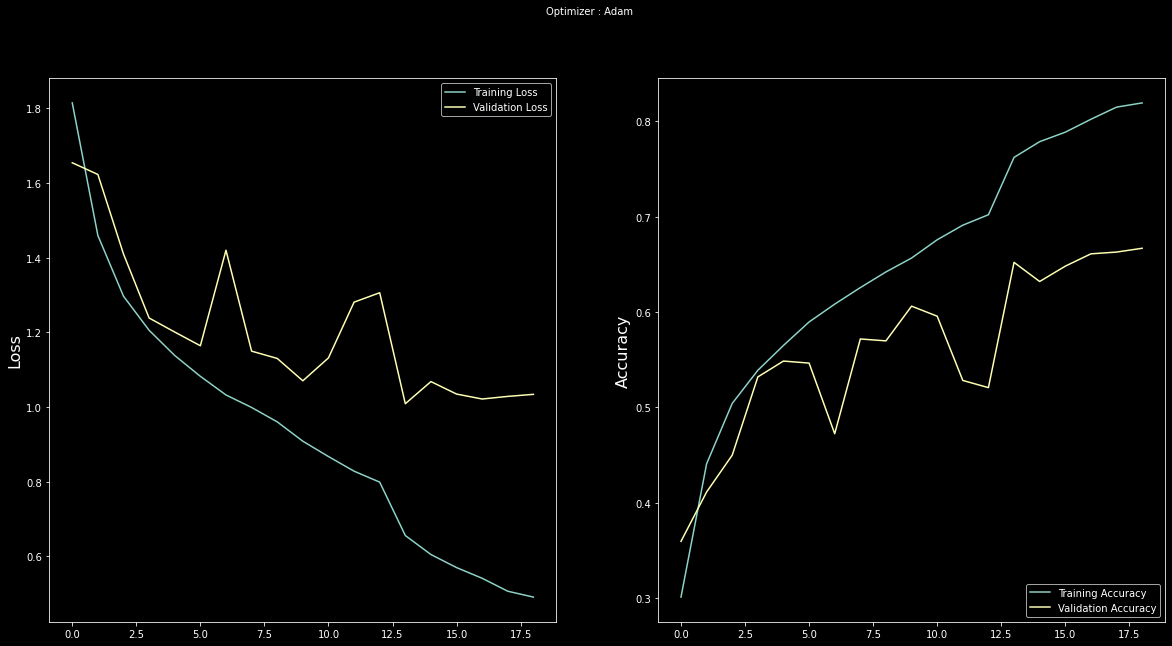

In [ ]:
#Plotting Accuracy & Loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

**Remarks :**
* It took around 3-4 minutes. Amazing, Fantastic,Fabulous.
* The training gave the accuracy of 82% and va_accuracy of 66%.
It seems excellent. So, I save the model and the detection i got from live video was excellent.
* One drawback of the system is the some Disgust faces are showing Neutral .Because less no. of disgust faces are given to train .This may be the reason.

*  I think it is a good score should improve the score
*  Thus i decided that i will deploy the model.

# **Real Time Video Face Detection Using Local Webcam**

## **Detect Single Face**

In [ ]:
import cv2
#from deepface import DeepFace


new_model=tf.keras.models.load_model('Final_model_all_data.h5')
path= "haarcascade_frontalface_default.xml"
font_scale=1.5
font=cv2.FONT_HERSHEY_PLAIN

#set the rectangle background to white
rectangle_bgr=(255,255,255)
#make a black image
img=np.zeros((500,500))
#set some text
text="Some text in a box!"
#get the width and height of the tesxt box
(text_width, text_height)=cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
#set the text start position
text_offset_x=10
text_offset_y=img.shape[0]-25
#make the coords of the box with a small padding of two pixels
box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width, text_offset_y-text_height-2))
cv2.rectangle(img,box_coords[0],box_coords[1],rectangle_bgr, cv2.FILLED)
cv2.putText(img,text,(text_offset_x,text_offset_y),font, fontScale=font_scale, color=(0,0,0),thickness=1)


cap = cv2.VideoCapture(0)
img_counter = 0
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
    img_counter = 0 
if not cap.isOpened():
    raise IOError("Cannot use webcam")


while True:
    ret,frame=cap.read()
    #eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h, x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        cv2.rectangle(frame, (x,y),(x+w,y+h+12),(255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)
        if len(facess)==0:
            print("Face not detected")
        else:
            for(ex,ey,ew,eh) in facess:
                face_roi= roi_color[ey:ey+eh,ex:ex+ew] ## Cropping The Face


    
    final_image=cv2.resize(face_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions=new_model.predict(final_image)
    
    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN
    
    
    if(np.argmax(Predictions)==0):
        status="Angry"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    
    
    elif(np.argmax(Predictions)==1):
        status="Disgust"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions)==2):
        status="Fear"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions)==3):
        status="Happy"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions)==4):
        status="Sad"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    elif(np.argmax(Predictions)==5):
        status="Surprise"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
    
    
    elif(np.argmax(Predictions)==6):
        status="Neutral"
        x1,y1,w1,h1= 0,0,175,75
        #Draw black background rectangle
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add Text
        cv2.putText(frame,status,(x1+int(w1/10),y1+int(h1/2)),font,0.7,(0,0,255),2)
        cv2.putText(frame,status,(100,150),font,3,(0,0,255),2,cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255))
                    
    
                    
    cv2.imshow('Face Emotion Recognition',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

    
    
            

cap.release()
cv2.destroyAllWindows()





Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


## **Detect Multiple Faces**

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # Face Detection
classifier =load_model('Final_model.h5')  #Load model

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']  # Emotion that will be predicted

cap = cv2.VideoCapture(0)  ## Opening webcam



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction

            prediction = classifier.predict(roi)[0]   #Prediction
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# **Real Time Video Detection Using Colab Webcam**

In [1]:
# import dependencies
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [2]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [3]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [4]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [5]:
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image
# start streaming video from webcam
  video_stream()
# label for video
  label_html = 'Capturing...'
# initialze bounding box to empty
  bbox = ''
  count = 0
  face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/Face_Emotion_Recognition_Capstone_Project/haarcascade_frontalface_default.xml') # Face Detection
  classifier =load_model('/content/drive/MyDrive/Face_Emotion_Recognition_Capstone_Project/Final_model.h5')  #Load model
  emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise'] 

  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)  ##Face Cropping for prediction
      if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0) ## reshaping the cropped face image for prediction
        prediction = classifier.predict(roi)[0]   #Prediction
        label=emotion_labels[prediction.argmax()]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)   # Text Adding
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    



    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes



In [6]:
face_detect()

<IPython.core.display.Javascript object>

# **Some Real Life Learning From This Amazing Project**

* Never Give Up.
* Update yourself from your Failures.
*  A Scientist needs to  overcome the failures.
* Try existing all methods to reach the goal.
* Have Patience and Good things take time to happen.